In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MLL/planes.csv')

In [ ]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0
10659,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [ ]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10655,False,False,False,False,False,False,False,False,False,False,False
10656,False,False,False,False,False,False,False,False,False,False,False
10657,False,False,False,False,False,True,False,False,False,True,False
10658,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,Price
count,10044.000000
mean,9044.411191
std,4472.304869
min,1759.000000
25%,5276.750000
50%,8366.000000
75%,12373.000000
max,54826.000000


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10655    False
10656    False
10657    False
10658    False
10659    False
Length: 10660, dtype: bool

In [ ]:
Airline_counts = df['Airline'].value_counts()

In [ ]:
print(Airline_counts)

Jet Airways          3685
IndiGo               1981
Air India            1686
Multiple carriers    1148
SpiceJet              787
Vistara               455
Air Asia              309
GoAir                 182
Name: Airline, dtype: int64


In [ ]:
labels = ['Jet Airways ', 'IndiGo', 'Air Asia', 'Multiple carriers','SpiceJet', 'Vistara', 'Air India', 'GoAir']
sizes = [3537, 1897, 296, 1097,745,438,1611,168]

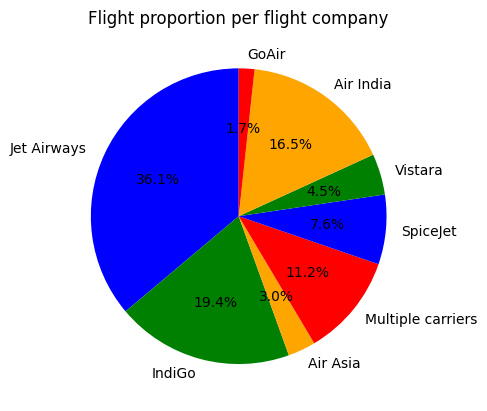

In [ ]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange', 'red'])

plt.title('Flight proportion per flight company')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
feature= df[['Airline', 'Price']]
target= df['Destination']
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8528, 2)
X_test shape: (2132, 2)
y_train shape: (8528,)
y_test shape: (2132,)
